# <font color=red>Tutorial 9 - K Nearest Neighbors (KNN)</font>

KNN falls in the supervised learning family of algorithms. This means that we are given a labeled dataset consisting of training observations (x,y) and would like to capture the relationship between x and y, then use this 'knowledge' to classify a new observetion x'. 

In [1]:
import numpy as np
import pandas as pd

## Loading scikit-learn dataset into pandas dataframe

The result of the load_iris() method is a map-like object with four components:
* target - 1D numpy array of target attribute value (the labels)
* data - 2D numpy array containing the data
* feature_names - 1D numpy array containing the feautures' names
* DESCR - text description of the dataset<br>
So it is easy to convert it to a pandas DataFrame:

In [2]:
from sklearn import neighbors, datasets
iris_data = datasets.load_iris()
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['class'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize the data

Text(0.5, 1.0, 'Petal Length vs Petal Width')

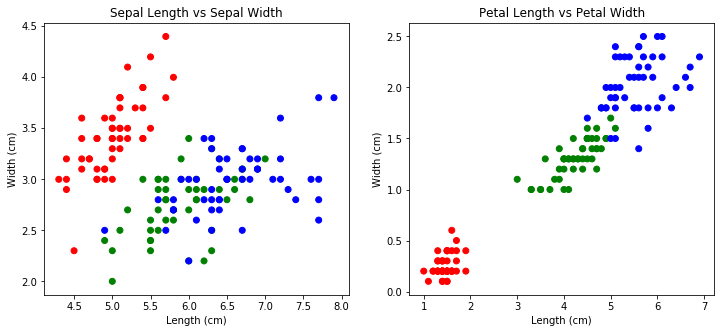

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5)) # initialize 12x5 size figure
colors = np.array(['red', 'green', 'blue']) # create color map, color for each iris type

plt.subplot(1, 2, 1)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=colors[iris_data.target])
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1, 2, 2)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c= colors[iris_data.target])
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.title('Petal Length vs Petal Width')

## Preprocessing

The next step is to split our dataset into its features and labels. The X variable contains the first four columns of the dataset (i.e. features) while y contains the labels.

In [6]:
X = iris_df.iloc[:, :-1].values # features
Y = iris_df.iloc[:, 4].values # labels

## Train Test Split

We will divide our dataset into train set and test set. 

The model will learn using the train set and will be evaluated by predicting the test set.

we will use the **train_test_split()** to split the data into train and test:

In [7]:
from sklearn.model_selection import train_test_split
# train_test_split?

The following code splits the dataset into 80% train data and 20% test data. 

This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records:

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  
print('X train set size: ' + str(X_train.shape))
print('X_test set size: ' + str(X_test.shape))
print('Y_train set size: ' + str(Y_train.shape))
print('Y_test set size: ' + str(Y_test.shape))

X train set size: (120, 4)
X_test set size: (30, 4)
Y_train set size: (120,)
Y_test set size: (30,)


- The train set contains 120 observations:
    - The are 4 featues in the 'X_train' parameter.
    - The label are in the 'Y_train' parameter. There is one column of label.
- The test set contains 30 observations with 1 label.
    - The are 4 featues in the 'X_test' parameter.
    - The label are in the 'Y_test' parameter. There is one column of label.

## Training and Predictions

* The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
* In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. 
* There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) # K=5

To train our model, we will use the fit() method:

In [10]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The final step is to make predictions on our test data (X_test):

In [21]:
Y_pred = classifier.predict(X_test)

For each observation in the test set the classifier predict a label. (0 or 1 or 2) 

So, in total there are 30 predicted values:

In [22]:
Y_pred

array([0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1])

## Evaluating the Algorithm

For the evaluation step we will compare the values of the prediction and real values in the data:

In [23]:
# Explore the real results in Y_test
unique, counts = np.unique(Y_test, return_counts=True)
print("The values of the predictions according to the classifier:")
for class_value, num_in_class in zip(unique, counts):
    print ("Class " + str(class_value) + " contains " + str(num_in_class) + " observations")

The values of the predictions according to the classifier:
Class 0 contains 11 observations
Class 1 contains 15 observations
Class 2 contains 4 observations


In [24]:
# Explore the predicted results in Y_pred
unique, counts = np.unique(Y_pred, return_counts=True)
print("The values of the observations according to the data:")
for class_value, num_in_class in zip(unique, counts):
    print ("Class " + str(class_value) + " contains " + str(num_in_class) + " observations")

The values of the observations according to the data:
Class 0 contains 11 observations
Class 1 contains 15 observations
Class 2 contains 4 observations


Therefore, in order to check how many predictions got the real value we will compare between them:

In [25]:
total_observations = len(Y_test)
total_matches = 0
for pred_value, real_value in zip(Y_pred, Y_test):
    if pred_value == real_value:
        total_matches += 1
        
print ("The accuracy of the classifier is: " + str(total_matches/total_observations))

The accuracy of the classifier is: 1.0


There is a function that calculate the accuracy of the classifier, so there is no need to do all the steps above:

The **score(X,Y)** method returns the **accuracy** of classifier.predict(X) comparing it to the given Y. In our case we would like to run prediction on the set of features X_test and compare the results to Y_test

In [26]:
classifier.score(X_test, Y_test)

1.0

## <font color=blue>**Exercise**</font>

1. Repeat the classification process with K=10. Did you different results?
2. Repeat the classification process with different size of train-test sets (try 50-50), how does it affects the results?

In [35]:
# Q1
classifier = KNeighborsClassifier(n_neighbors=10) # K=10
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
classifier.score(X_test, Y_test)

1.0

If the number of neighbors is identical to number of groups, we can get to a situation where there is no majority and then the labeling will be random - 'results will depend on the ordering of the training data'

In [45]:
# Q2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  
print('X train set size: ' + str(X_train.shape))
print('X_test set size: ' + str(X_test.shape))
print('Y_train set size: ' + str(Y_train.shape))
print('Y_test set size: ' + str(Y_test.shape))


# Explore the predicted results in Y_pred
unique, counts = np.unique(Y_pred, return_counts=True)
print("The values of the observations according to the data:")
for class_value, num_in_class in zip(unique, counts):
    print ("Class " + str(class_value) + " contains " + str(num_in_class) + " observations")
    
classifier = KNeighborsClassifier(n_neighbors=5) # K=10
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
classifier.score(X_test, Y_test)

X train set size: (120, 4)
X_test set size: (30, 4)
Y_train set size: (120,)
Y_test set size: (30,)
The values of the observations according to the data:
Class 0 contains 12 observations
Class 1 contains 8 observations
Class 2 contains 10 observations


1.0

3. In the following example we have an 'easy' classification task. We got the following dataset in which each animal who has wings is also a bird, but it contains only 2 animals who have wings.
- Train a KNN classifier on the given data
- Test your trained classifier on the given 'test_sample' - contains one animal without wings ('0'), and one with wings ('1').
- Is the classifier working properly? if not, explain why and suggest adjusments to make it work properly

In [50]:
has_wings = np.zeros(100, dtype='int')
has_wings[0:2] = [1, 1]

df = pd.DataFrame(has_wings, columns=['has_wings'])
df['is_bird'] = df['has_wings'].apply(lambda x: 1 if x > 0 else 0)
df.head(10)

# preprocessing for training
X = df[['has_wings']] # feature
Y = df['is_bird'] # label
test_sample = pd.DataFrame({'has_wings' : [0, 1]}) # test

In [48]:
# Q3
